In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Package

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

## Menampilkan Gambar

In [3]:
image = Image.open("/content/drive/MyDrive/image/bunga.jpeg")

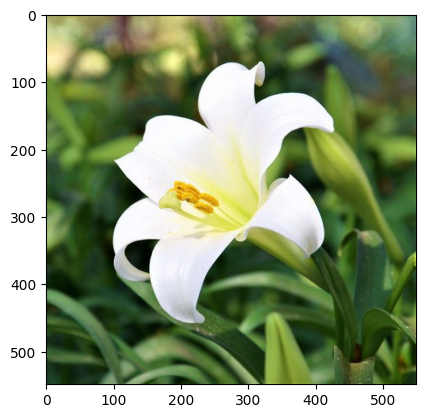

In [4]:
plt.imshow(image)
plt.show()

In [5]:
pixel_array = np.array(image)

print("Image Shape:", pixel_array.shape)
print(pixel_array)

Image Shape: (549, 549, 3)
[[[221 223 148]
  [206 208 133]
  [201 203 128]
  ...
  [106 152 126]
  [107 153 127]
  [104 150 124]]

 [[206 208 133]
  [191 193 118]
  [185 187 112]
  ...
  [100 146 120]
  [102 148 122]
  [101 147 121]]

 [[198 200 127]
  [182 184 111]
  [175 177 104]
  ...
  [ 96 142 116]
  [ 99 145 119]
  [100 145 122]]

 ...

 [[ 29  60  42]
  [ 30  61  43]
  [ 31  63  42]
  ...
  [ 28  51  25]
  [ 31  54  28]
  [ 33  56  30]]

 [[ 29  60  42]
  [ 30  61  43]
  [ 31  63  42]
  ...
  [ 30  53  27]
  [ 32  55  29]
  [ 34  57  31]]

 [[ 30  61  43]
  [ 30  61  43]
  [ 31  63  42]
  ...
  [ 34  54  27]
  [ 35  55  28]
  [ 34  57  29]]]


## Grayscale

In [7]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    grayscale = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return grayscale

## Harris Corner

In [10]:
from scipy.ndimage import gaussian_filter

def harris_corner(image, k=0.04, window_size=3):
    if len(image.shape) == 3:
        gray_image = rgb2gray(image)
    else:
        gray_image = image.astype(np.float32)

    Ix = ndimage.sobel(gray_image, axis=0)
    Iy = ndimage.sobel(gray_image, axis=1)

    Ix2 = Ix * Ix
    Iy2 = Iy * Iy
    Ixy = Ix * Iy

    Ix2_smooth = gaussian_filter(Ix2, sigma=1)
    Iy2_smooth = gaussian_filter(Iy2, sigma=1)
    Ixy_smooth = gaussian_filter(Ixy, sigma=1)

    detM = Ix2_smooth * Iy2_smooth - Ixy_smooth * Ixy_smooth
    traceM = Ix2_smooth + Iy2_smooth
    R = detM - k * (traceM * traceM)

    corner_coords = np.argwhere(R == ndimage.maximum_filter(R, size=window_size))

    return corner_coords, R

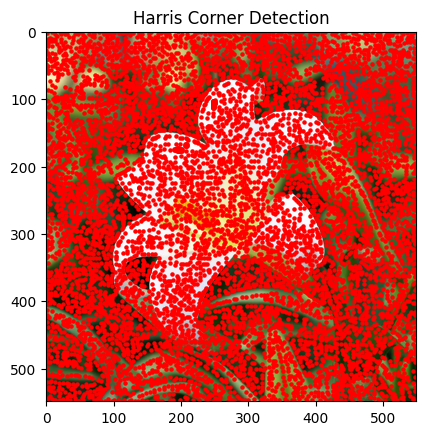

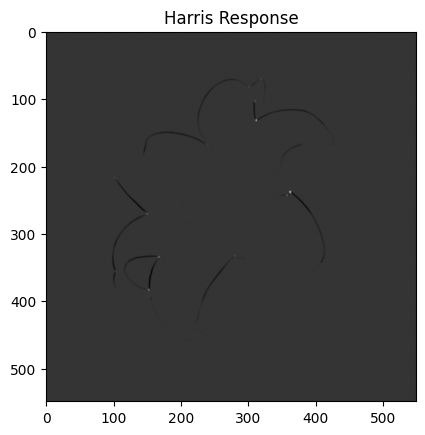

In [12]:
corner_coords, R = harris_corner(pixel_array)

plt.imshow(image)
plt.scatter(corner_coords[:, 1], corner_coords[:, 0], marker='o', s=5, c='red')
plt.title('Harris Corner Detection')
plt.show()

# Display the Harris response image
plt.imshow(R, cmap='gray')
plt.title('Harris Response')
plt.show()

## Scale-Invariant Feature Detection

In [16]:
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt

blobs_log = blob_log(R, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(R, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(R, max_sigma=30, threshold=.01)

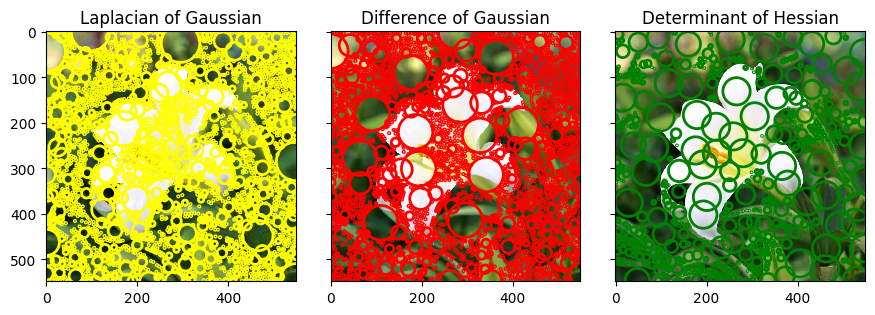

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title('Laplacian of Gaussian')
ax[0].imshow(image, interpolation='nearest')
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
    ax[0].add_patch(c)

ax[1].set_title('Difference of Gaussian')
ax[1].imshow(image, interpolation='nearest')
for blob in blobs_dog:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax[1].add_patch(c)

ax[2].set_title('Determinant of Hessian')
ax[2].imshow(image, interpolation='nearest')
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='green', linewidth=2, fill=False)
    ax[2].add_patch(c)

plt.tight_layout()
plt.show()
